# CONTENT

Codebase for a genetic algorithm implementation of the solver. The result show that there is a lot of variablity of the parameter and in the definition of exploraiton and exploitation and tehrefore not a roboust optimization techinque probably for this scope

In [ ]:
#Download the package needed for the evolutionary algorithms
!pip install deap

In [ ]:
#For numerical operation and optimization
import numpy as np
import itertools
from scipy.optimize import lsq_linear

#For plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#EA imports
from deap import base
from deap import creator
from deap import tools


#Auxiliary libraries
import random
import cvxpy as cp
from itertools import combinations
from tqdm import tqdm

In [ ]:
M = np.array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]])

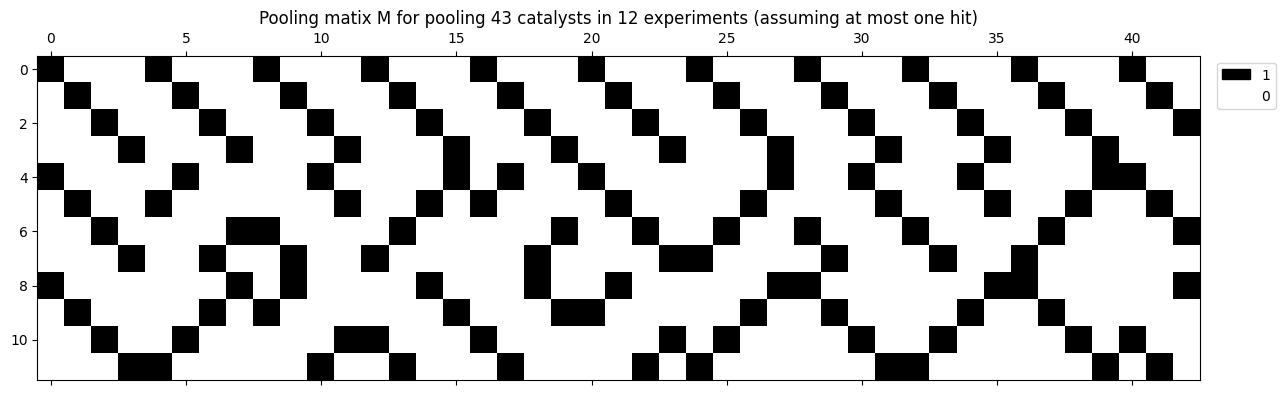

In [ ]:
# Plot the data with a specified size
fig, ax = plt.subplots(figsize=(15, 8))
cax = ax.matshow(M, cmap='gray_r')

# Create a custom legend
import matplotlib.patches as mpatches
black_patch = mpatches.Patch(color='black', label='1')
white_patch = mpatches.Patch(color='white', label='0')

# Place the legend outside the plot
ax.legend(handles=[black_patch, white_patch], loc='upper center', bbox_to_anchor=(1.04, 1))
plt.title(f"Pooling matix M for pooling {M.shape[1]} catalysts in {M.shape[0]} experiments (assuming at most one hit)")
plt.show()

This design would be able to correctly identify one true hit without further optimization, but if there are more than two real hits a step of compressed sensing will be needed

In [ ]:
###### SIMULATION WITH SYNTHETIC DATA ########

#Insert here the hitters (their indexes as a int) and the perc yeald that they
#will prodcue (their numerical value as float in [0,100]) in the following dict
true_hitters = {0:70, 1:40, 2:10, 3:5, 4:80, 5:30, 6:35}

def generate_y_and_true_x(true_hitters, M):
  """
  Generates simulated experimental results (y) and the corresponding true
  catalyst activity vector (true_x) based on a provided dictionary of
  true hitters and their yields.

  Args:
    true_hitters: A dictionary where keys are catalyst indices (integers) and
                   values are their corresponding yields (floats between 0 and 100).
    M: The pooling matrix (numpy array).

  Returns:
    A tuple containing:
      - y: A numpy array representing the simulated experimental results.
      - true_x: A numpy array representing the true catalyst activity vector,
                where each element corresponds to the yield of a catalyst.
  """
  true_x = np.zeros(M.shape[1])
  for key, value in true_hitters.items():
    true_x[key] = value

  y = M @ true_x
  return y, true_x

y, true_x = generate_y_and_true_x(true_hitters, M)
y_pre  = y

np.set_printoptions(suppress=True)
print("y vector is: ", y, "\n")
print("True x vector to recover is: \n", true_x)
np.set_printoptions(suppress=False)

y vector is:  [150.  70.  45.   5. 100. 120.  10.  40.  70.  75.  40.  85.] 

True x vector to recover is: 
 [70. 40. 10.  5. 80. 30. 35.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


-----
Evolutionary algorithm part

In [ ]:
#Simple univariate fitness: this means that "better individual will have lower residuals"
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
#Initialize individuals that inherit from the type list and have a fitness attribute
creator.create("Individual", list, fitness=creator.FitnessMax)

In [ ]:
from scipy.stats import bernoulli

toolbox = base.Toolbox()

# Attribute generator: 'attr_coord' is an attribute  that corresponds to the presence (1) or
# not (0) of that catalyst in the solution

# we initialize the probability of presence of each catalyst in the solution as a Berboulli RV
# with mean 0.1 (no strict reason apart from presumed sparsity of the solution, maybe can later be changed with something more data oriented)
toolbox.register("attr_coord", bernoulli.rvs, 0.1)

# Structure initializers: an 'individual' is a list consisting of 2 'attr_coord' elements
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_coord, n=M.shape[1])

# The population is a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
# Fitness function that in our case is the residual of the L2 + Lasso regularization
def residual(M, y, individual, lambdaa = 0.05, verbose = False):
  indices = [i for i in range (len(individual)) if individual[i] == 1]
  non_indices = [i for i in range (len(individual)) if individual[i] == 0]

  x = cp.Variable(M.shape[1])

  # obj = cp.Minimize(cp.norm2(y - M @ x) + lambdaa * cp.norm(x,1))
  obj = cp.Minimize(cp.norm2(y - M @ x))
  constraints = [ x[list(non_indices)] == 0]

  prob = cp.Problem(obj, constraints)
  prob.solve()

  if verbose:
    print("status: {}".format(prob.status))
    print("optimal value: {}".format(prob.value))

  #The second summand is the non-convex part we cannot directly optimize for with standard methos
  return prob.value + 3 * len(indices)

In [ ]:
def mutation(individual):

  index = random.randint(0, len(individual) - 1)
  individual[index] = 1 - individual[index]

  individual.fitness = residual(M, y, individual)

In [ ]:
def select_good_candidates(population, k):
  """
  Select the top k individuals from a population based on their fitness values.
  Remember that low values of fitness are better
  """
  # Sort the population by fitness in ascending order
  sorted_population = sorted(population, key=lambda x: x.fitness)

  # Select the top k individuals
  selected_individuals = sorted_population[:k]

  return selected_individuals

def select_bad_candidates(population, k):
  """
  Select the bottom k individuals from a population based on their fitness values.
  Remember that low values of fitness are better
  """
  # Sort the population by fitness in descending order
  sorted_population = sorted(population, key=lambda x: x.fitness, reverse=True)

  # Select the bottom k individuals
  selected_individuals = sorted_population[:k]

  return selected_individuals



In [ ]:
def crossover(ind1, ind2, k):
  """
  Select form two individuals a contiguous chunk of lenght k and swap them
  """
  # Choose a random crossover point
  crossover_point_1 = random.randint(0, len(ind1) - k)
  crossover_point_2 = random.randint(0, len(ind2) - k)

  # Perform the crossover
  ind1[crossover_point_1:crossover_point_1 + k], ind2[crossover_point_2:crossover_point_2 + k] = ind2[crossover_point_2:crossover_point_2 + k], ind1[crossover_point_1:crossover_point_1 + k]

  #Recalcualte fitnesses
  ind1.fitness = residual(M, y, ind1)
  ind2.fitness = residual(M, y, ind2)


In [ ]:
#####################################
####### CHOOSE YOUR OPERATORS #######
## from the options provided above ##
#####################################


# Register the fitness function
toolbox.register("evaluate", residual, M, y)

# Register the crossover operator
toolbox.register("mate", crossover)

# Register a mutation operator
toolbox.register("mutate", mutation)

# Register the selection operator for best candidates with its parameter
toolbox.register("select_best", select_good_candidates, k=20)

# Register the selection operator for worst candidates with its parameter
toolbox.register("select_worst", select_bad_candidates, k=60)


In [ ]:
################################
####### OTHER PARAMETERS #######
################################

random.seed(8032001)

# Create the initial population of n individuals.
pop = toolbox.population(n=100)

# CXPB  is the probability with which two individuals are combined.
# MUTPB is the probability for mutating an individual.
# NGENS is the number of generations.

CXPB, MUTPB, NGENS = 0.3, 1, 10

In [ ]:
# Evaluate the initial population and initialize the
# fitness attribute for each individual
fitnesses = list(map(toolbox.evaluate, pop))

for ind, fit in zip(pop, fitnesses):
    ind.fitness = fit

In [ ]:
################################
######## REAL EVOLUTION ########
################################

#Dictionary that stores the history of the populations in order to compare them
popdict = {}


for gen in tqdm(range(NGENS)):
  #save population in the dictionary
  popdict[gen] = list(map(toolbox.clone, pop))

  print("Fitness of the best individual at generation", gen, "is ", toolbox.select_best(pop, k=1)[0].fitness)

  # Select the next generation individuals
  individuals_to_mutate = toolbox.select_best(pop)
  individuals_to_mate = toolbox.select_worst(pop, k=40)

  # Apply crossover and mutation

  couples = list(combinations(individuals_to_mate, 2))

  for child1, child2 in couples:

    # Apply the crossover to two individuals with probability CXPB
    if random.random() < CXPB:
      ## Notice that you don't leave the parents in the population
      new_ind = toolbox.mate(child1, child2, k=2)

  for mutant in individuals_to_mutate:

    # Apply the mutation to all population with probability MUTPB
    if random.random() < MUTPB:
      toolbox.mutate(mutant)

  #select the top 80% individuals and reinitialize the other 20%
  pop = toolbox.select_best(pop,k= int(0.8 * len(pop)))
  rand_indiv = toolbox.population(n=int(0.2 * len(pop)))

  #calulate fitnes for new individuals
  fitnesses = list(map(toolbox.evaluate, rand_indiv))
  for ind, fit in zip(rand_indiv, fitnesses):
    ind.fitness = fit

  #add new individuals to the population
  pop.extend(rand_indiv)

  popdict[gen+1] = list(map(toolbox.clone, pop))

  0%|          | 0/10 [00:00<?, ?it/s]

Fitness of the best individual at generation 0 is  57.75077638993337


 10%|█         | 1/10 [00:11<01:40, 11.19s/it]

Fitness of the best individual at generation 1 is  29.970442628930027


 20%|██        | 2/10 [00:21<01:24, 10.59s/it]

Fitness of the best individual at generation 2 is  28.129680806780527


 30%|███       | 3/10 [00:25<00:53,  7.67s/it]

Fitness of the best individual at generation 3 is  30.00000000000002


 40%|████      | 4/10 [00:29<00:37,  6.26s/it]

Fitness of the best individual at generation 4 is  30.00000000000005


 50%|█████     | 5/10 [00:34<00:29,  5.81s/it]

Fitness of the best individual at generation 5 is  31.08248290463863


 60%|██████    | 6/10 [00:38<00:20,  5.21s/it]

Fitness of the best individual at generation 6 is  30.000000000000007


 70%|███████   | 7/10 [00:42<00:14,  4.88s/it]

Fitness of the best individual at generation 7 is  30.000000000000046


 80%|████████  | 8/10 [00:48<00:10,  5.07s/it]

Fitness of the best individual at generation 8 is  30.0


 90%|█████████ | 9/10 [00:52<00:04,  4.77s/it]

Fitness of the best individual at generation 9 is  30.00000000000002


100%|██████████| 10/10 [00:57<00:00,  5.71s/it]


In [ ]:
#Get the fittest individual of the last generation
fittest_individual = toolbox.select_best(pop, k=1)[0]
fittest_individual.fitness

30.000000000000007

In [ ]:
fittest_first_generation = toolbox.select_best(popdict[0], k=1)[0]
fittest_first_generation.fitness

57.75077638993337

In [ ]:
def get_indices(individual):
  return [i for i in range (len(individual)) if individual[i] == 1]

get_indices(fittest_individual), get_indices(fittest_first_generation)

([3, 7, 9, 11, 14, 17, 19, 27, 31, 36], [0, 2, 4, 17, 29, 30])